In [ ]:
import pandas as pd
import numpy as np
shop= pd.read_csv("shopping_trends_updated.csv")
shop.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:


# Calculate the total purchase amount for each gender
gender_purchase_total = shop.groupby('Gender')['Purchase Amount (USD)'].sum()

# Print the result
gender_purchase_total

In [ ]:
shop.shape


(3900, 18)

In [ ]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
shop.columns


Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [ ]:
shop.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [ ]:
shop_dup = shop[shop.duplicated()]
shop_dup

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases


In [ ]:
shop.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [ ]:
shop.describe(include="object")

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,675,2223,2223,677,584


**2.DESCRIPTIVE ANALYSIS**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
shop['age_category']=pd.cut(shop['Age'],bins=[0,15,18,30,50,70],labels=['child','teen','young_adults','middle_aged','old'])
shop.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,age_category
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,old
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,young_adults
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,middle_aged
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,young_adults
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,middle_aged


(array([212., 206., 153., 231., 147., 224., 214., 147., 226., 159., 199.,
        223., 155., 226., 147., 243., 213., 148., 197., 230.]),
 array([18. , 20.6, 23.2, 25.8, 28.4, 31. , 33.6, 36.2, 38.8, 41.4, 44. ,
        46.6, 49.2, 51.8, 54.4, 57. , 59.6, 62.2, 64.8, 67.4, 70. ]),
 <BarContainer object of 20 artists>)

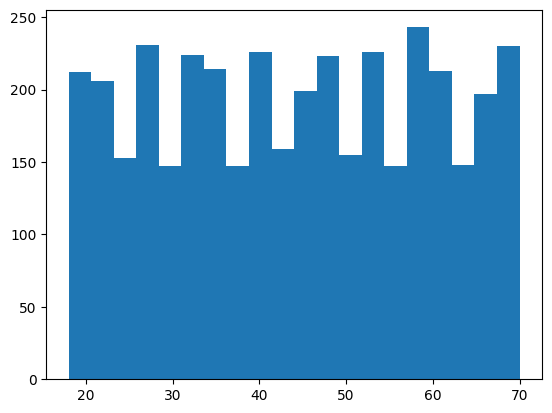

In [ ]:
plt.hist(shop["Age"],bins=20)

<Axes: xlabel='Gender'>

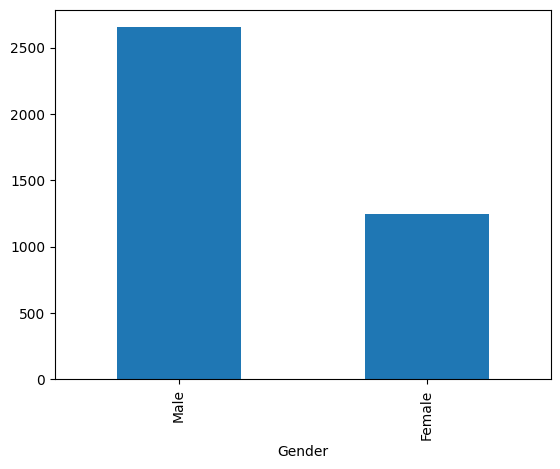

In [ ]:
shop["Gender"].value_counts().plot(kind='bar')

NameError: name 'plot' is not defined

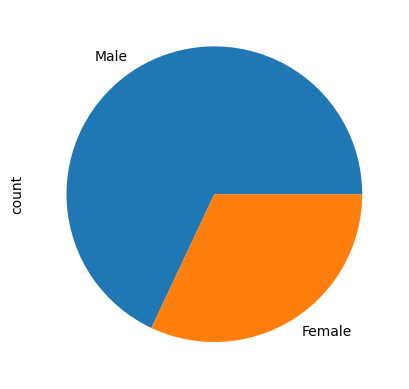

In [ ]:
data=shop["Gender"].value_counts()
data.plot(kind ='pie')
plot.xlabel("gender")

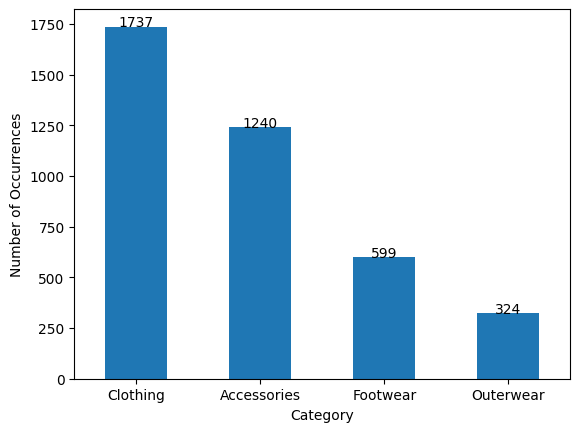

In [ ]:
ax = shop['Category'].value_counts().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(
        int(p.get_height()),
        (p.get_x() + p.get_width() / 2, p.get_height() + 1),
        ha='center'
    )
plt.xlabel("Category")
plt.ylabel("Number of Occurrences")
plt.show()



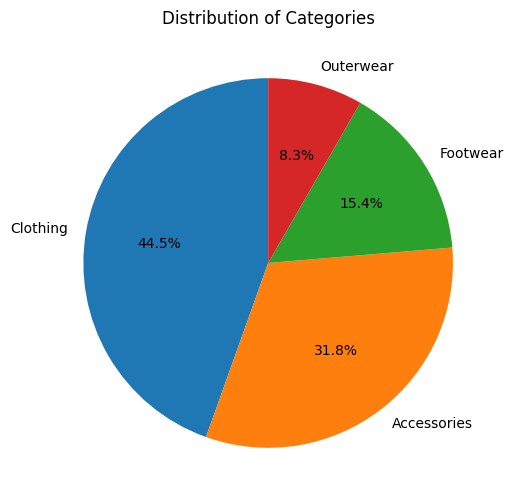

In [ ]:
ax = shop['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6, 6))
plt.ylabel("")
plt.title("Distribution of Categories")
plt.show()


In [ ]:
print(shop.columns)
shop.columns = shop.columns.str.strip()





Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'age_category'],
      dtype='object')


In [ ]:
data=shop["Season"].value_counts()
data

,count
Season,
Spring,999
Fall,975
Winter,971
Summer,955


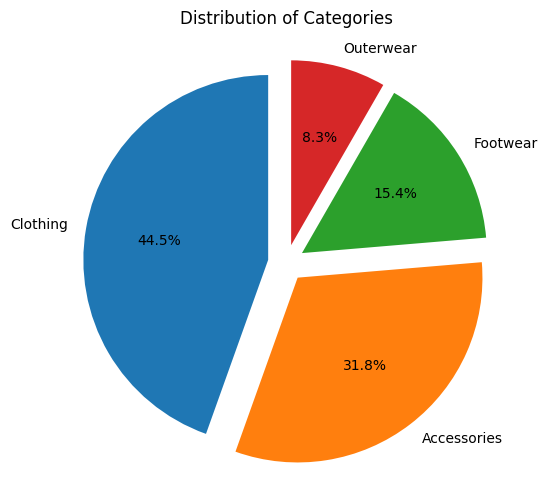

In [ ]:
explode = [0.1] * len(shop['Category'].value_counts())
ax = shop['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6, 6), explode=explode)
plt.ylabel("")
plt.title("Distribution of Categories")
plt.show()


Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'age_category'],
      dtype='object')


<Axes: xlabel='Subscription Status', ylabel='count'>

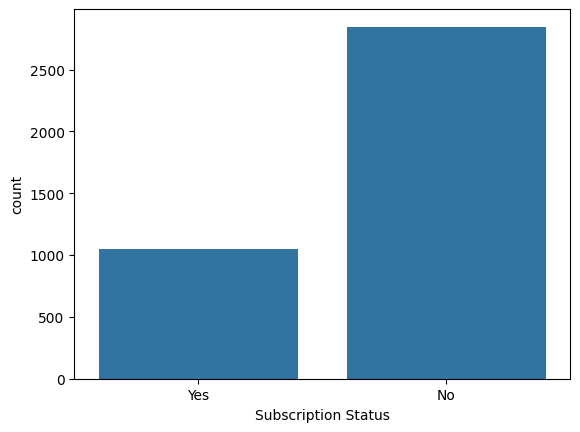

In [ ]:
print(shop.columns)
sns.countplot(data=shop, x='Subscription Status')





8.payment method among coustmers

In [ ]:
shop.groupby('Payment Method')['Purchase Amount (USD)'].mean()

,Purchase Amount (USD)
Payment Method,
Bank Transfer,59.712418
Cash,59.704478
Credit Card,60.074516
Debit Card,60.915094
PayPal,59.245199
Venmo,58.949527


In [ ]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Customer ID             3900 non-null   int64   
 1   Age                     3900 non-null   int64   
 2   Gender                  3900 non-null   object  
 3   Item Purchased          3900 non-null   object  
 4   Category                3900 non-null   object  
 5   Purchase Amount (USD)   3900 non-null   int64   
 6   Location                3900 non-null   object  
 7   Size                    3900 non-null   object  
 8   Color                   3900 non-null   object  
 9   Season                  3900 non-null   object  
 10  Review Rating           3900 non-null   float64 
 11  Subscription Status     3900 non-null   object  
 12  Shipping Type           3900 non-null   object  
 13  Discount Applied        3900 non-null   object  
 14  Promo Code Used         

In [ ]:
print(shop.columns) # Print the actual column names for confirmation
shop.columns = shop.columns.str.strip() # Strip any leading/trailing spaces from column names if present
# Select columns using the actual names (case-sensitive)
num_fea = shop[["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]]
print(num_fea.head())

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'age_category'],
      dtype='object')
   Age  Purchase Amount (USD)  Review Rating  Previous Purchases
0   55                     53            3.1                  14
1   19                     64            3.1                   2
2   50                     73            3.1                  23
3   21                     90            3.5                  49
4   45                     49            2.7                  31


In [ ]:
cor_mat=num_fea.corr()
cor_mat

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Age,1.000000,-0.010424,-0.021949,0.040445
Purchase Amount (USD),-0.010424,1.000000,0.030776,0.008063
Review Rating,-0.021949,0.030776,1.000000,0.004229
Previous Purchases,0.040445,0.008063,0.004229,1.000000


<Axes: >

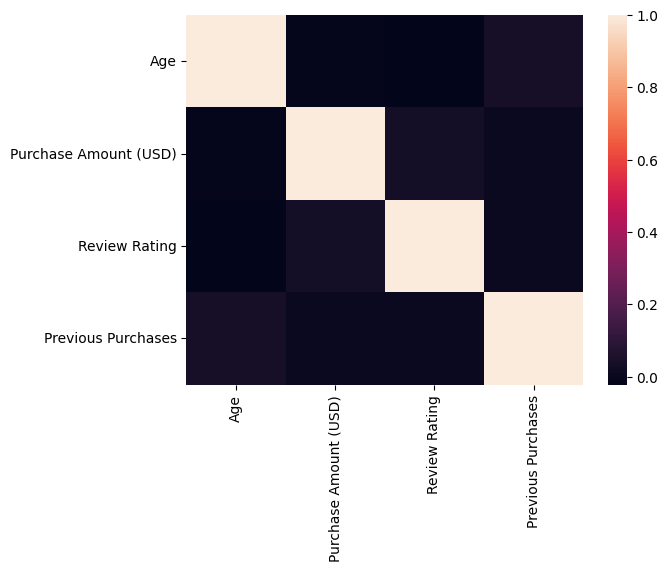

In [ ]:
sns.heatmap(cor_mat)

In [4]:
import pandas as pd

shop = pd.read_csv('shopping_trends_updated.csv')

shop['Age'].value_counts()


,count
Age,
69,88
57,87
41,86
25,85
49,84
50,83
54,83
27,83
62,83


In [5]:
shop['Age'].mean()

44.06846153846154

In [6]:
shop['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [7]:
shop['age_category']=pd.cut(shop['Age'],bins=[0,15,18,30,50,70],labels=['child','teen','young_adults','middle_aged','old'])

In [10]:
import plotly.express as px

fig = px.histogram(shop, x='age_category', color='Gender', barmode='group')
fig.show()


2.average purchase value

In [11]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'age_category'],
      dtype='object')

In [18]:
shop['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [19]:
shop.groupby('Category')['Purchase Amount (USD)'].mean()

,Purchase Amount (USD)
Category,
Accessories,59.838710
Clothing,60.025331
Footwear,60.255426
Outerwear,57.172840


3.gender has highest number of purchases

In [20]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'age_category'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='Purchase Amount (USD)'>

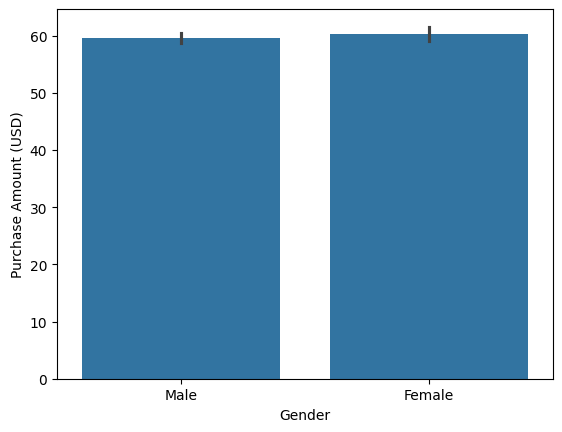

In [23]:
import seaborn as sns
sns.barplot(data=shop, x='Gender', y='Purchase Amount (USD)')


4.most commonly purchased items

In [24]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'age_category'],
      dtype='object')

In [26]:
shop.groupby('Category')['Item Purchased'].value_counts()


Category     Item Purchased
Accessories  Jewelry           171
             Belt              161
             Sunglasses        161
             Scarf             157
             Hat               154
             Handbag           153
             Backpack          143
             Gloves            140
Clothing     Blouse            171
             Pants             171
             Shirt             169
             Dress             166
             Sweater           164
             Socks             159
             Skirt             158
             Shorts            157
             Hoodie            151
             T-shirt           147
             Jeans             124
Footwear     Sandals           160
             Shoes             150
             Sneakers          145
             Boots             144
Outerwear    Jacket            163
             Coat              161
Name: count, dtype: int64

In [27]:
fig=px.histogram(shop,x='Category',color='Item Purchased')
fig.show()

5.ANY SPECIFIC REASON FOR SHOPPING

In [29]:
shop[''Season''].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [32]:
shop['Season'].value_counts()


,count
Season,
Spring,999
Fall,975
Winter,971
Summer,955


In [35]:
fig=px.histogram(shop,x='Season',color='Category')
fig.show()

6.average rating given by coustmer

In [36]:
shop_groupby=shop.groupby('Category')['Review Rating'].mean()
shop_groupby

,Review Rating
Category,
Accessories,3.768629
Clothing,3.723143
Footwear,3.790651
Outerwear,3.746914


In [37]:
fig=px.bar(shop_groupby,x=shop_groupby.index,y='Review Rating',color=shop_groupby.index)
fig.show()

7.NOTABLE BEHAVIOUR IN COUSTMERS

In [38]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'age_category'],
      dtype='object')

In [39]:
shop['Subscription Status'].value_counts()

,count
Subscription Status,
No,2847
Yes,1053


<Axes: xlabel='Subscription Status', ylabel='Purchase Amount (USD)'>

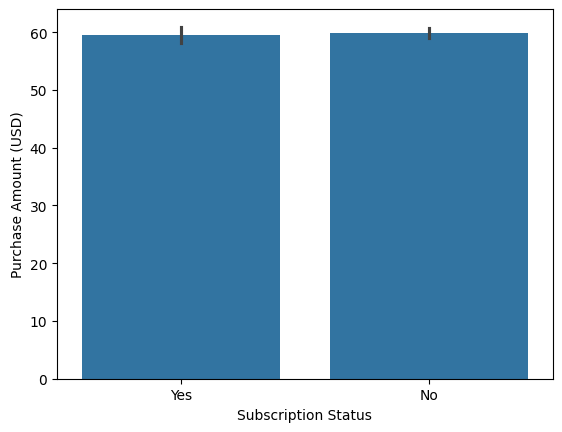

In [40]:
sns.barplot(data=shop,x='Subscription Status',y='Purchase Amount (USD)')

In [42]:
shop['subscription status']=shop['Subscription Status'].map({'Yes':1,'No':0})
shop['subscription status']

,subscription status
0,1
1,1
2,1
3,1
4,1
...,...
3895,0
3896,0
3897,0
3898,0


In [47]:
import pandas as pd
import plotly.express as px

# Grouping and sorting payment methods by average purchase amount
payment_data = shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().reset_index()

# Sorting values in descending order
payment_data = payment_data.sort_values(by='Purchase Amount (USD)', ascending=False)

# Plotting the bar chart
fig = px.bar(payment_data, x='Payment Method', y='Purchase Amount (USD)', title='8.Average Purchase Amount by Payment Method')

fig.show()


In [48]:
import pandas as pd
import plotly.express as px

# Grouping by 'Promo Code Used' and calculating total purchase amount
promo_data = shop.groupby('Promo Code Used')['Purchase Amount (USD)'].sum().reset_index()

# Displaying the summary
print(promo_data)

# Creating a sunburst chart to visualize spending behavior
fig = px.sunburst(shop, path=['Gender', 'Promo Code Used'], values='Purchase Amount (USD)',
                  title='Purchase Amount Distribution by Gender and Promo Code Usage')

fig.show()


  Promo Code Used  Purchase Amount (USD)
0              No                 133670
1             Yes                  99411


In [49]:
fig=px.bar(shop,x='Subscription Status',y='Purchase Amount (USD)')
fig.show()

10.FREQUENCY OF CHANGES

In [54]:
shop.columns


Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'age_category',
       'subscription status'],
      dtype='object')

In [57]:
shop [['Age','age_category']]

,Age,age_category
0,55,old
1,19,young_adults
2,50,middle_aged
3,21,young_adults
4,45,middle_aged
...,...,...
3895,40,middle_aged
3896,52,old
3897,46,middle_aged
3898,44,middle_aged


In [61]:
import plotly.express as px

# Grouping data by 'Frequency of Purchases' and 'Age_category'
age_purchase_group = shop.groupby(['Frequency of Purchases', 'age_category'])['Age'].sum().reset_index()

# Creating a pie chart with a bright theme
fig = px.pie(age_purchase_group,
             names='age_category',
             values='Age',
             color='Frequency of Purchases',
             title='Age Category Distribution by Frequency of Purchases')

# Update layout for bright mode
fig.update_layout(template='plotly_white')

fig.show()



<ipython-input-61-869d205f890c>:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



correlation between purchased amound and product

In [62]:
shop_group = shop.groupby('Size')['Purchase Amount (USD)'].sum().reset_index()

# Create the bar chart
fig = px.bar(shop_group, x='Size', y='Purchase Amount (USD)', title='Total Purchase Amount by Size')

# Show the chart
fig.show()

12.shipping type is preferred by coustmers

In [64]:
shop.groupby('Category')['Shipping Type'].value_counts().sort_values(ascending=False)


Category     Shipping Type 
Clothing     Standard          297
             Free Shipping     294
             Next Day Air      293
             Express           290
             Store Pickup      282
             2-Day Shipping    281
Accessories  Store Pickup      217
             Next Day Air      211
             Standard          208
             2-Day Shipping    206
             Express           203
             Free Shipping     195
Footwear     Free Shipping     122
             Standard          100
             Store Pickup       98
             Express            96
             Next Day Air       93
             2-Day Shipping     90
Outerwear    Free Shipping      64
             Express            57
             Store Pickup       53
             Next Day Air       51
             2-Day Shipping     50
             Standard           49
Name: count, dtype: int64

13.presence of discount affected in purchase of coustmers

In [65]:
import plotly.express as px

# Group by 'Discount Applied' and sum the 'Purchase Amount (USD)'
shop_group = shop.groupby('Discount Applied')['Purchase Amount (USD)'].sum().reset_index()

# Create the histogram
fig = px.bar(shop_group, x='Discount Applied', y='Purchase Amount (USD)', title='Total Purchase Amount by Discount Applied')

# Show the chart
fig.show()


14.

In [66]:
import plotly.express as px

# Create a sunburst chart
fig = px.sunburst(shop, path=['Gender', 'Discount Applied'], values='Purchase Amount (USD)', title='Sunburst Chart of Purchase Amount by Gender and Discount Applied')

# Show the chart
fig.show()


14.are ther any specific records

In [69]:
import plotly.express as px

# Create a histogram for the 'Color' column
fig = px.histogram(shop, x='Color', title='Distribution of Colors')

# Show the chart
fig.show()


In [70]:
shop['Color'].value_counts().nlargest

<bound method Series.nlargest of Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: count, dtype: int64>

In [72]:
#15.average number of previous purchases
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'age_category',
       'subscription status'],
      dtype='object')

In [73]:
shop['Previous Purchases'].mean()

25.35153846153846

16.purchase difference between coustmers

In [74]:
shop.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending=False)


,Purchase Amount (USD)
Location,
Alaska,67.597222
Pennsylvania,66.567568
Arizona,66.553846
West Virginia,63.876543
Nevada,63.379310
Washington,63.328767
North Dakota,62.891566
Virginia,62.883117
Utah,62.577465


In [75]:
import plotly.express as px

# Group by 'Location' and calculate the mean of 'Purchase Amount (USD)'
shop_group = shop.groupby('Location')['Purchase Amount (USD)'].mean().reset_index()

# Create a bar chart
fig = px.bar(shop_group, x='Location', y='Purchase Amount (USD)', title='Average Purchase Amount per Location')

# Show the chart
fig.show()


17.is there any relationsgip between coustmer age and category of products

In [76]:
import plotly.express as px

# Group by 'Category' and calculate the mean of 'Age'
shop_group = shop.groupby('Category')['Age'].mean().reset_index()

# Create a bar chart
fig = px.bar(shop_group, x='Category', y='Age', title='Average Age per Category')

# Show the chart
fig.show()


18.

In [77]:
import plotly.express as px

# Group by 'Gender' and calculate the sum of 'Purchase Amount (USD)'
shop_group = shop.groupby('Gender')['Purchase Amount (USD)'].sum().reset_index()

# Create a bar chart
fig = px.bar(shop_group, x='Gender', y='Purchase Amount (USD)', title='Total Purchase Amount by Gender')

# Show the chart
fig.show()


In [79]:
px.sunburst(data_frame=shop, path=['Gender', 'age_category'], values='Purchase Amount (USD)')



/usr/local/lib/python3.11/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

